In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read each dataset 
data_0 = pd.read_csv("/content/0-resting.csv",sep = ';')
data_1 = pd.read_csv("/content/1-walking.csv",sep = ';')
data_2 = pd.read_csv("/content/2-steps.csv",sep = ';')
data_3 = pd.read_csv("/content/3-plank.csv",sep = ';')
data_4 = pd.read_csv("/content/4-mountainClimbing.csv",sep = ';')
data_5 = pd.read_csv("/content/5-squats.csv",sep = ';')

print("Resting datapoints: ", len(data_0. index))
print("Walking datapoints: ", len(data_1. index))
print("Steps datapoints: ", len(data_2. index))
print("Plank datapoints: ", len(data_3. index))
print("MC datapoints: ", len(data_4. index))
print("Squats datapoints: ", len(data_5. index))

Resting datapoints:  47518
Walking datapoints:  11669
Steps datapoints:  17903
Plank datapoints:  15300
MC datapoints:  9811
Squats datapoints:  12098


In [3]:
def sub_plots(data_0, data_1, data_2, data_3, data_4, data_5):

  fig, axes = plt.subplots(nrows=2, ncols=3)

  data_0.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,0],  title='Resting', figsize=(15,10))
  data_1.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,1], title='Walking')
  data_2.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,2], title='Steps')
  data_3.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,0], title='Plank')
  data_4.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,1],  title='MC')
  data_5.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,2], title='Squats')
  plt.show()

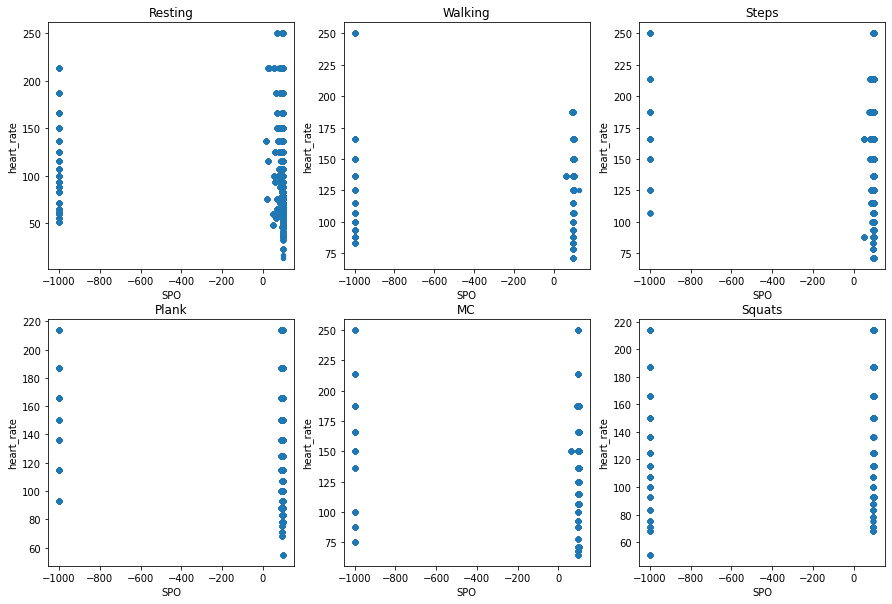

In [4]:
# Raw data
sub_plots(data_0, data_1, data_2, data_3, data_4, data_5)

In [5]:
data_0_new= data_0.copy()
data_1_new= data_1.copy()
data_2_new= data_2.copy()
data_3_new= data_3.copy()
data_4_new= data_4.copy()
data_5_new= data_5.copy()

# Calculate mean of SPO without negative values
# Replacce replace negative values with mean 
data_0_new.loc[data_0_new['SPO'] < 0, 'SPO'] = data_0.loc[data_0['SPO'] > 0, 'SPO'].mean()
data_1_new.loc[data_1_new['SPO'] < 0, 'SPO'] = data_1.loc[data_1['SPO'] > 0, 'SPO'].mean()
data_2_new.loc[data_2_new['SPO'] < 0, 'SPO'] = data_2.loc[data_2['SPO'] > 0, 'SPO'].mean()
data_3_new.loc[data_3_new['SPO'] < 0, 'SPO'] = data_3.loc[data_3['SPO'] > 0, 'SPO'].mean()
data_4_new.loc[data_4_new['SPO'] < 0, 'SPO'] = data_4.loc[data_4['SPO'] > 0, 'SPO'].mean()
data_5_new.loc[data_5_new['SPO'] < 0, 'SPO'] = data_5.loc[data_5['SPO'] > 0, 'SPO'].mean()

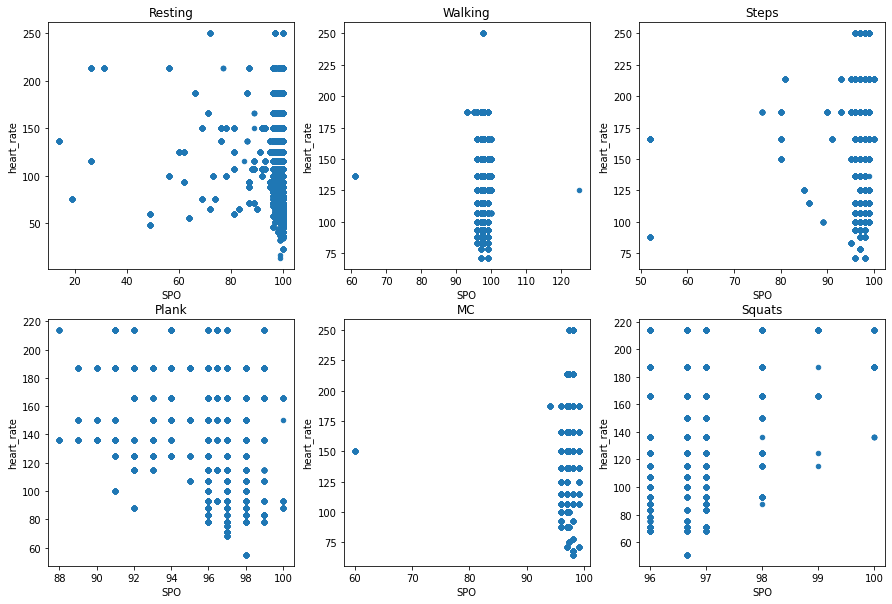

In [6]:
# Afeter removing negative values
sub_plots(data_0_new, data_1_new, data_2_new, data_3_new, data_4_new, data_5_new)

In [7]:
# Data per person per exercise
def balance(data):
  data_len=[]

  for per in range(1, 6):
    l= len(data[(data['person_id']==per)])
    if l != 0: data_len.append(l) 
  mini= min(data_len)
  data = data.groupby('person_id').sample(n=mini, random_state=1).reset_index(drop=True)
  return data

In [8]:
data_0_bal = data_0_new.copy()
data_1_bal = data_1_new.copy()
data_2_bal = data_2_new.copy()
data_3_bal = data_3_new.copy()
data_4_bal = data_4_new.copy()
data_5_bal = data_5_new.copy()

data_0_bal = balance(data_0_bal)
data_1_bal = balance(data_1_bal)
data_2_bal = balance(data_2_bal)
data_3_bal = balance(data_3_bal)
data_4_bal = balance(data_4_bal)
data_5_bal = balance(data_5_bal)

In [9]:
def check_data_len(data, data_b):
   for per in range(1, 6):
       l= len(data[(data['person_id']==per)])
       print("Original set person "+str(per)+ ": ",l)

   for per in range(1, 6):
       l= len(data_b[(data_b['person_id']==per)])
       print("Balanced set person "+str(per)+ ": ",l)

In [10]:
check_data_len(data_5_new, data_5_bal)

Original set person 1:  0
Original set person 2:  4288
Original set person 3:  2304
Original set person 4:  3358
Original set person 5:  2148
Balanced set person 1:  0
Balanced set person 2:  2148
Balanced set person 3:  2148
Balanced set person 4:  2148
Balanced set person 5:  2148


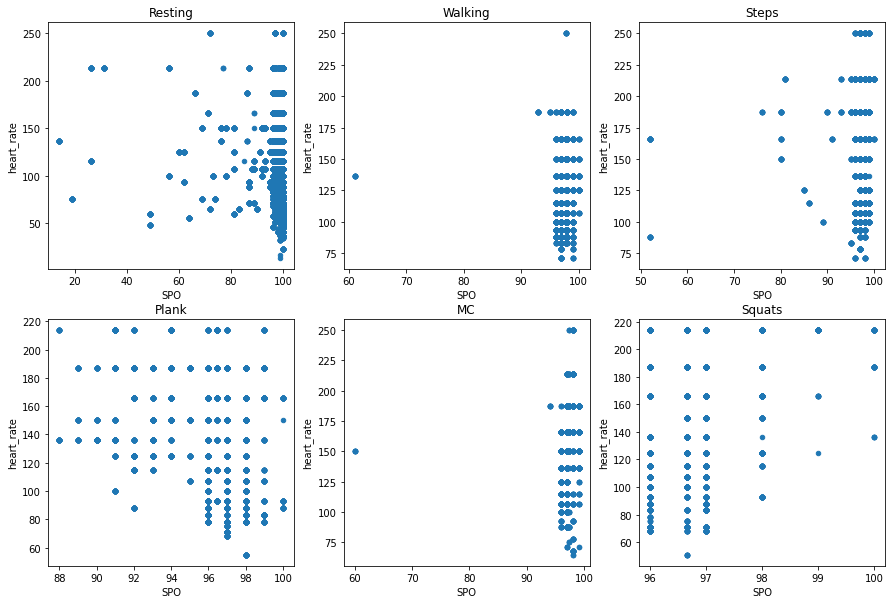

In [11]:
# Afeter balancing values per person
sub_plots(data_0_bal, data_1_bal, data_2_bal, data_3_bal, data_4_bal, data_5_bal)

In [12]:
def reduce_datset(n,data):
  data = data.groupby(np.arange(len(data))// (len(data)/n)).mean()
  data[['person_id', 'exercise']] = data[['person_id', 'exercise']].astype(int)
  return data

In [13]:
# Reduce dataset taking mean each X rows, getting n datapoints per exercise

n=2500
data_0_red = data_0_bal.copy()
data_1_red = data_1_bal.copy()
data_2_red = data_2_bal.copy()
data_3_red = data_3_bal.copy()
data_4_red = data_4_bal.copy()
data_5_red = data_5_bal.copy()

data_0_red = reduce_datset(n,data_0_red)
data_1_red = reduce_datset(n,data_1_red)
data_2_red = reduce_datset(n,data_2_red)
data_3_red = reduce_datset(n,data_3_red)
data_4_red = reduce_datset(n,data_4_red)
data_5_red = reduce_datset(n,data_5_red)

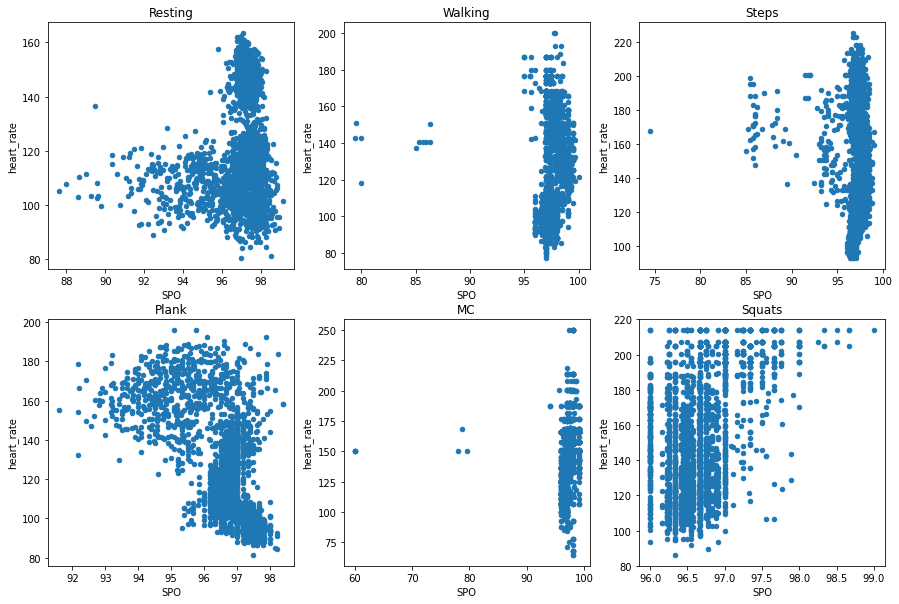

In [14]:
# Afeter reducing dataset
sub_plots(data_0_red, data_1_red, data_2_red, data_3_red, data_4_red, data_5_red)

In [15]:
def create_em_data(data, ex):
  baseline = pd.read_csv("/content/baselines_pulseoxi.csv",sep = ';')
  lv_spo=[]
  lv_hr=[]

  for per in range(1, 6):
    means = baseline.loc[(baseline['person_id'] == per) & (baseline['exercise'] == ex)]
    dom = data.loc[(data['person_id'] == per)]

    l_means= len(means)
    ld = len(dom)      

    if ld != 0 and l_means !=0:
      em_spo = np.random.normal(means['spo_base'],dom.std()[4],ld)
      em_hr = np.random.normal(means['heart_rate_base'],dom.std()[5],ld)
      
      #append everything    
      lv_spo = np.append(lv_spo,em_spo)
      lv_hr = np.append(lv_hr,em_hr)

  #add column to data 
  data['spo_base'] = lv_spo
  data['heart_rate_base'] = lv_hr
  return data

In [16]:
# Create emulated data (SPO, HR) given meand from base values (Pulse Oximeter) and SD from data colected (Sensor)
data_0_red= create_em_data(data_0_red,0)
data_1_red= create_em_data(data_1_red,1)
data_2_red= create_em_data(data_2_red,2)
data_3_red= create_em_data(data_3_red,3)
data_4_red= create_em_data(data_4_red,4)
data_5_red= create_em_data(data_5_red,5)

In [17]:
def join_acc_datset(path,n,data):
  pos = pd.read_csv(path,sep = ';')
  pos = pos.drop(columns=['person_id', 'exercise'])
  pos = pos.groupby(pd.RangeIndex(len(pos)) // (len(pos)/n) ).first()
  data = pd.concat([data, pos],axis=1)
  return data

In [18]:
# Read accelerometer data of each exercise
data_0_red = join_acc_datset("/content/0-accel.csv",n,data_0_red)
data_1_red = join_acc_datset("/content/1-accel.csv",n,data_1_red)
data_2_red = join_acc_datset("/content/2-accel.csv",n,data_2_red)
data_3_red = join_acc_datset("/content/3-accel.csv",n,data_3_red)
data_4_red = join_acc_datset("/content/4-accel.csv",n,data_4_red)
data_5_red = join_acc_datset("/content/5-accel.csv",n,data_5_red)

In [19]:
# Join everything in a single dataset
data_set_group18= []
data_set_group18 = data_0_red.append([data_1_red, data_2_red, data_3_red, data_4_red, data_5_red])
data_set_group18.to_csv('data_set_group18.csv', sep=',')

data_set_group18

,person_id,exercise,spo_base,heart_rate_base,SPO,heart_rate,time,x,y,z
0.0,1,0,98.005605,104.530243,96.885019,152.052632,0.002633,-2.411336,-1.152453,9.674681
1.0,1,0,98.191630,101.055916,97.207287,157.000000,0.252638,-2.130819,-1.522035,9.554481
2.0,1,0,98.031317,102.104288,97.055556,148.444444,0.492646,-2.044149,-1.621279,9.349408
3.0,1,0,97.862392,101.962780,96.944129,150.947368,0.742651,-2.061663,-1.653911,9.536818
4.0,1,0,97.914621,101.140152,97.218803,149.611111,0.982656,-1.996548,-1.738784,9.698482
...,...,...,...,...,...,...,...,...,...,...
2495.0,5,5,98.957004,72.216070,96.415399,112.750000,27.686831,-1.354234,5.897586,6.375841
2496.0,5,5,98.781749,55.429746,96.441065,102.666667,27.776832,-2.955604,7.452403,7.239994
2497.0,5,5,98.737952,74.238728,96.665399,122.750000,27.856833,-2.724035,5.935307,6.784941
2498.0,5,5,99.366887,65.583801,96.333333,101.000000,27.946834,-2.550546,6.716982,6.214776
